# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Data Preprocessing

## Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 67740 files belonging to 38 classes.


## Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16945 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

# Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Dropout(0.25))  # Adding dropout for regularization

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(1500, activation='relu'))

In [15]:
model.add(Dropout(0.4))  # Adding dropout for regularization

In [16]:
# Output layer
model.add(Dense(38, activation='softmax'))

## Compiling Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

# Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2117/2117 [==============================] - 222s 98ms/step - loss: 1.4184 - accuracy: 0.5835 - val_loss: 0.5376 - val_accuracy: 0.8276
Epoch 2/10
2117/2117 [==============================] - 229s 108ms/step - loss: 0.5279 - accuracy: 0.8322 - val_loss: 0.3205 - val_accuracy: 0.8950
Epoch 3/10
2117/2117 [==============================] - 261s 123ms/step - loss: 0.3887 - accuracy: 0.8748 - val_loss: 0.3878 - val_accuracy: 0.8712
Epoch 4/10
2117/2117 [==============================] - 263s 124ms/step - loss: 0.3380 - accuracy: 0.8908 - val_loss: 0.3226 - val_accuracy: 0.8997
Epoch 5/10
2117/2117 [==============================] - 267s 126ms/step - loss: 0.3049 - accuracy: 0.9019 - val_loss: 0.2607 - val_accuracy: 0.9153
Epoch 6/10
2117/2117 [==============================] - 295s 139ms/step - loss: 0.3033 - accuracy: 0.9025 - val_loss: 0.2288 - val_accuracy: 0.9281
Epoch 7/10
2117/2117 [==============================] - 277s 131ms/step - loss: 0.2822 - accuracy: 0.9103 - val_l

# Model Evaluation

In [21]:
train_loss, train_acc = model.evaluate(training_set)
print(train_loss, train_acc)

2117/2117 [==============================] - 67s 31ms/step - loss: 0.1244 - accuracy: 0.9612
0.12444273382425308 0.961189866065979


In [22]:
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss, val_acc)

530/530 [==============================] - 17s 33ms/step - loss: 0.2403 - accuracy: 0.9240
0.2403186708688736 0.9240483641624451


# Save Model

In [24]:
model.save('trained_model.keras')

In [25]:
training_history.history

{'loss': [1.4184187650680542,
  0.5279299020767212,
  0.38874104619026184,
  0.33802396059036255,
  0.30490362644195557,
  0.303316593170166,
  0.28216806054115295,
  0.28099682927131653,
  0.26738715171813965,
  0.2949458658695221],
 'accuracy': [0.5835104584693909,
  0.8321523666381836,
  0.874756395816803,
  0.8907588124275208,
  0.9018600583076477,
  0.9025243520736694,
  0.9103484153747559,
  0.9118984341621399,
  0.9145703911781311,
  0.9090493321418762],
 'val_loss': [0.5375992655754089,
  0.3204881548881531,
  0.3878310024738312,
  0.3225938677787781,
  0.26069486141204834,
  0.22881105542182922,
  0.22587566077709198,
  0.24342015385627747,
  0.3600534200668335,
  0.24031858146190643],
 'val_accuracy': [0.8276187777519226,
  0.894954264163971,
  0.8711714148521423,
  0.8996754288673401,
  0.9152552485466003,
  0.9280613660812378,
  0.9275302290916443,
  0.9231041669845581,
  0.8900560736656189,
  0.9240483641624451]}

## Record history in JSON

In [26]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

In [27]:
epochs = [i for i in range(1, 11)]

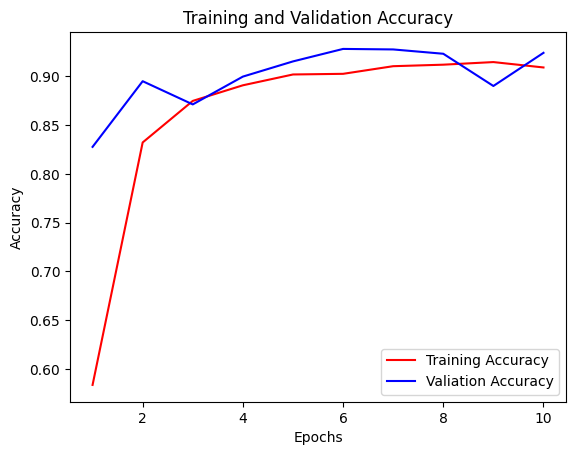

In [30]:
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Valiation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16945 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)

530/530 [==============================] - 14s 25ms/step


In [34]:
y_pred, y_pred.shape

(array([[9.9935299e-01, 3.3462333e-04, 2.3171851e-06, ..., 4.8494504e-13,
         1.3186512e-10, 3.6407982e-12],
        [9.9821031e-01, 1.7487786e-03, 2.5283560e-09, ..., 2.0008780e-15,
         1.1038971e-10, 4.2425878e-14],
        [9.9810022e-01, 2.7554747e-04, 5.3647305e-05, ..., 1.7499701e-08,
         1.5381479e-06, 1.7950462e-07],
        ...,
        [4.4820109e-08, 2.5429540e-11, 6.8247579e-07, ..., 2.6668367e-05,
         6.9092398e-10, 8.1024301e-01],
        [9.4366060e-12, 7.5946535e-20, 1.6293274e-11, ..., 1.3278307e-06,
         1.2048136e-16, 9.9734503e-01],
        [6.0333943e-12, 3.2765912e-12, 1.5028924e-10, ..., 3.2673415e-09,
         1.4186703e-06, 9.8756033e-01]], dtype=float32),
 (16945, 38))

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(16945,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(16945,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

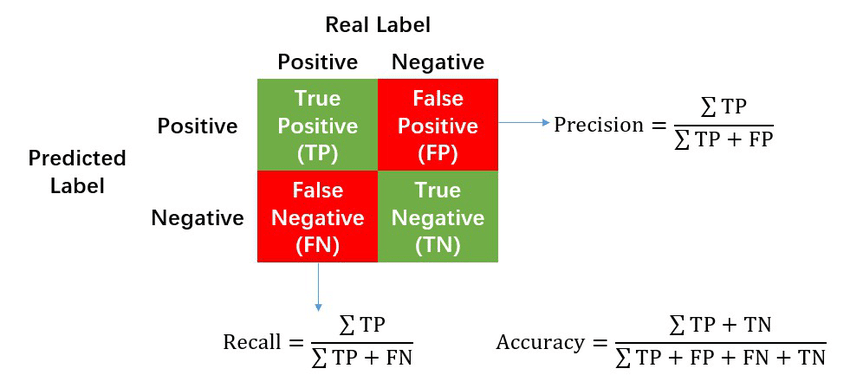

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.90      0.92       504
                                 Apple___Black_rot       0.91      0.99      0.95       497
                          Apple___Cedar_apple_rust       0.95      0.93      0.94       440
                                   Apple___healthy       0.93      0.88      0.91       502
                               Blueberry___healthy       0.96      0.91      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.80      0.53      0.64       100
                       Corn_(maize)___Common_rust_       0.97      0.96      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.96      0.

In [40]:
cm = confusion_matrix(y_true, predicted_categories)
cm.shape

(38, 38)

## Confusion matrix visualization

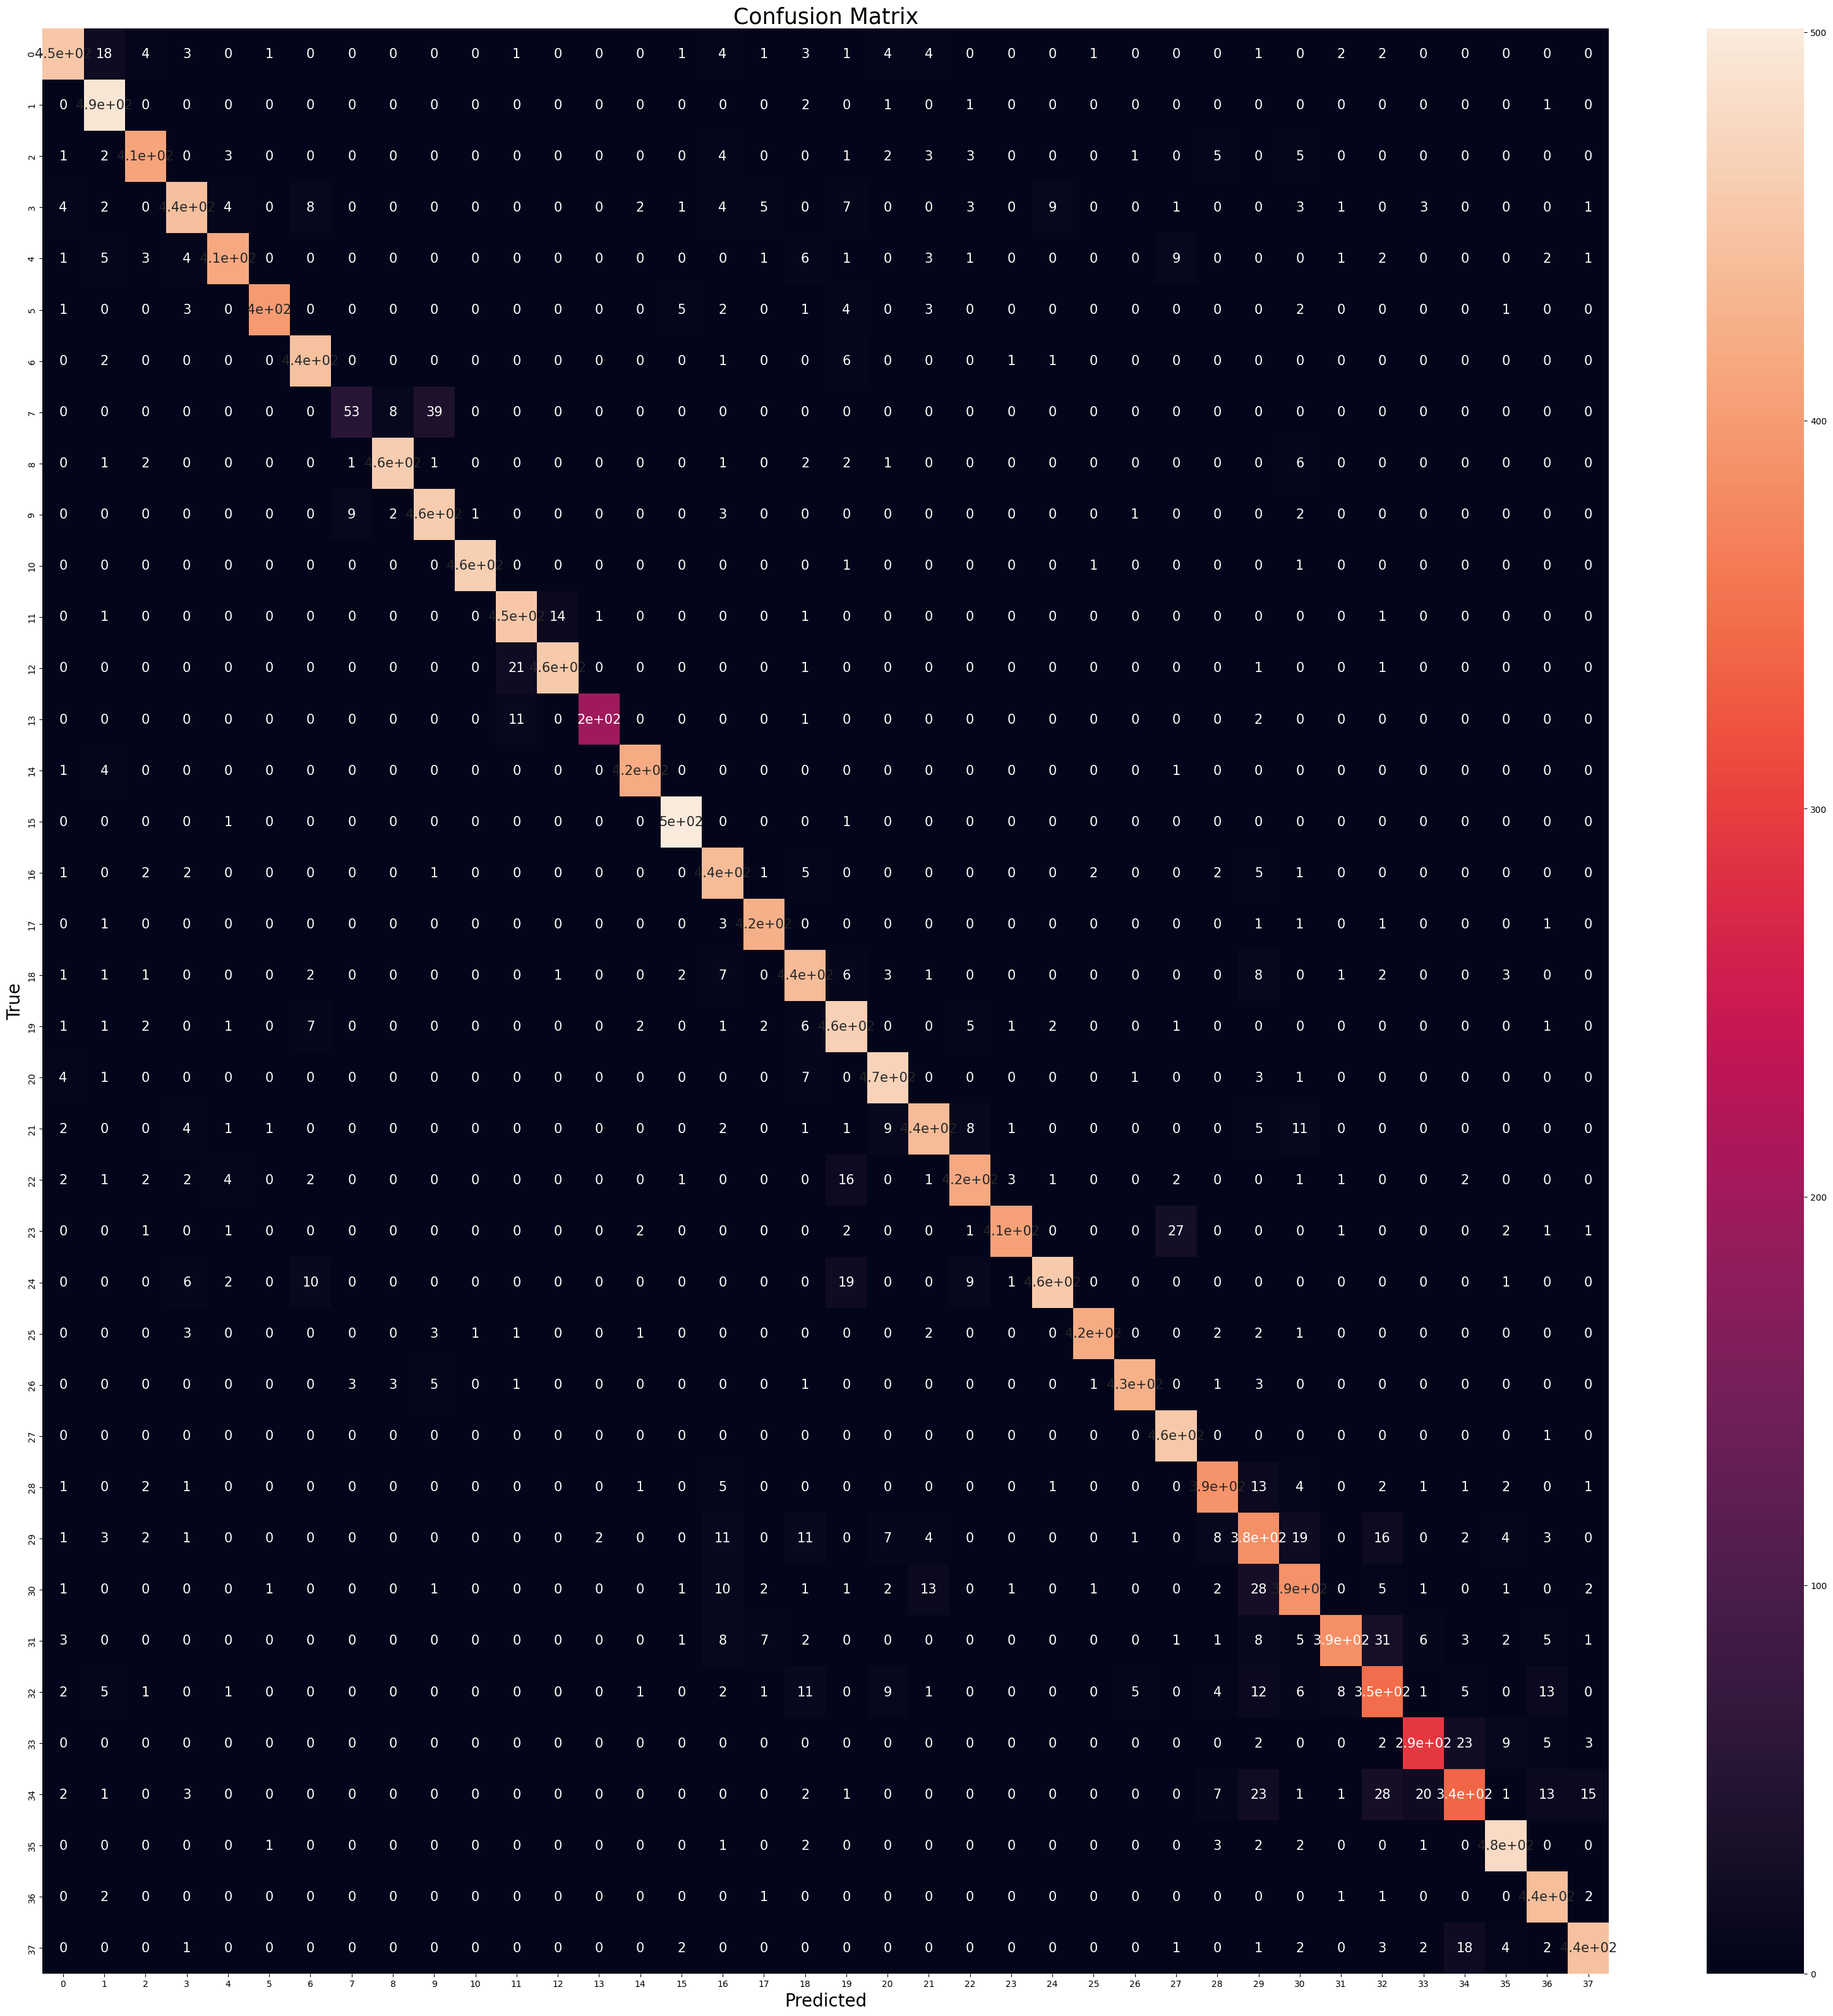

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':15})
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()